# naive Bayes

### use data about prior events to estimate the probability of future events

Possible outcomes are known as **events** and the single opportunity for the event to occur is known as a **trial**. Calculating the probability of one event to the probability of another event is called **joint probability**. If the two events are independent of each other, they are called **independent events**. **Dependent events**, however, are the basis for predictive modeling. The probability of event A given that event B occurred is known as **conditional probability**.

### Strengths 
**1)** Simple, fast, and very effective **2)** Does well with noisy and missing data **3)** Requires relatively few examples for training, but also works well with very large numbers of examples **4)** Easy to obtain the estimated probability for a prediction

### Weaknesses
**1)** Relies on an often-faulty assumption of equally important and independent features **2)** Not ideal for datasets with large numbers of numeric features **3)** Estimated probabilities are less reliable than the predicted classes


### Step One: Collect the data

In [1]:
sms_raw <- read.csv("../csv/sms_spam.csv", stringsAsFactors=FALSE)

### Step two: Explore and Prepare the Data

In [2]:
str(sms_raw)

'data.frame':	5559 obs. of  2 variables:
 $ type: chr  "ham" "ham" "ham" "spam" ...
 $ text: chr  "Hope you are having a good week. Just checking in" "K..give back my thanks." "Am also doing in cbe only. But have to pay." "complimentary 4 STAR Ibiza Holiday or Â£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out"| __truncated__ ...


In [3]:
sms_raw$type <- factor(sms_raw$type)

In [4]:
str(sms_raw)

'data.frame':	5559 obs. of  2 variables:
 $ type: Factor w/ 2 levels "ham","spam": 1 1 1 2 2 1 1 1 2 1 ...
 $ text: chr  "Hope you are having a good week. Just checking in" "K..give back my thanks." "Am also doing in cbe only. But have to pay." "complimentary 4 STAR Ibiza Holiday or Â£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out"| __truncated__ ...


In [5]:
table(sms_raw$type)


 ham spam 
4812  747 

#### Data Transformation

In [6]:
install.packages("tm", repo = "https://cran.r-project.org/")

also installing the dependencies 'NLP', 'slam'



package 'NLP' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bradley Bailey\AppData\Local\Temp\RtmpiqDWhQ\downloaded_packages


In [7]:
library(tm)

Warning message:
: package 'tm' was built under R version 3.2.5Loading required package: NLP


Build a corpus containing the text from the $text variable using the "tm" library

In [8]:
sms_corpus <- Corpus(VectorSource(sms_raw$text))

In [9]:
print(sms_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5559


In [10]:
inspect(sms_corpus[1:3])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 49

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 23

[[3]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 43



In [11]:
lapply(sms_corpus[1:3], as.character)

$`1`
[1] "Hope you are having a good week. Just checking in"

$`2`
[1] "K..give back my thanks."

$`3`
[1] "Am also doing in cbe only. But have to pay."

Let's remove all numbers, punctuation, "stop words" (such as "to", "and", "but") and case sensitivity from our corpus

In [12]:
corpus_clean <- tm_map(sms_corpus, tolower)
corpus_clean <- tm_map(corpus_clean, removeNumbers)

In [13]:
corpus_clean <- tm_map(corpus_clean, removeWords, stopwords())

In [14]:
corpus_clean <- tm_map(corpus_clean, removePunctuation)

In [15]:
corpus_clean <- tm_map(corpus_clean, stripWhitespace)

In [16]:
inspect(corpus_clean[1:3])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3

[[1]]
[1] hope good week just checking 

[[2]]
[1] kgive back thanks

[[3]]
[1]  also cbe pay



Let's create a data structure called **sparse matrix** using the DocumentTermMatrix() function

In [17]:
corpus_clean <- tm_map(corpus_clean, PlainTextDocument)

The above code is neccessary because the "tolower" parameter above does not automatically converts the data back to a text document in the newest version of "tm". Older versions did this automatically

In [18]:
sms_dtm <- DocumentTermMatrix(corpus_clean)

In [19]:
sms_dtm

<<DocumentTermMatrix (documents: 5559, terms: 7925)>>
Non-/sparse entries: 42654/44012421
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

Create training and test datasets

Split the raw data frame:

In [20]:
sms_raw_train <- sms_raw[1:4169, ]
sms_raw_test <- sms_raw[4170:5559, ]

Split the document-term matrix the same way:

In [21]:
sms_dtm_train <- sms_dtm[1:4169, ]
sms_dtm_test <- sms_dtm[4170:5559, ]

And finally the corpus:

In [22]:
sms_corpus_train <- corpus_clean[1:4169]
sms_corpus_test <- corpus_clean[4170:5559]

Check to make sure the amount of spam is evenly distributed between the two sets

In [23]:
prop.table(table(sms_raw_train$type))
prop.table(table(sms_raw_test$type))


      ham      spam 
0.8647158 0.1352842 


      ham      spam 
0.8683453 0.1316547 

Visualizing Text Data

In [24]:
install.packages("wordcloud", repo = "https://cran.r-project.org/")

package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bradley Bailey\AppData\Local\Temp\RtmpiqDWhQ\downloaded_packages


In [25]:
library(wordcloud)

Warning message:
: package 'wordcloud' was built under R version 3.2.5Loading required package: RColorBrewer


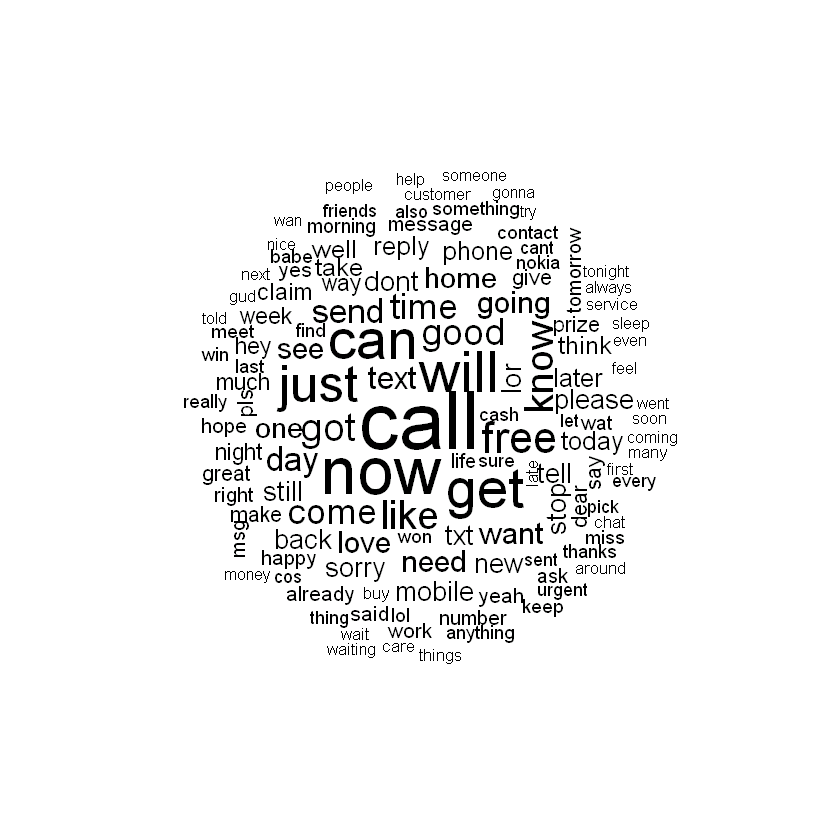

In [26]:
wordcloud(sms_corpus_train, min.freq=40, random.order=FALSE)

Let's use R's subset() function to take a subset of the sms_raw_train data by SMS type. First, we'll create a subset where type is equal to spam:

In [27]:
spam <- subset(sms_raw_train, type == "spam")
ham <- subset(sms_raw_train, type == "ham")

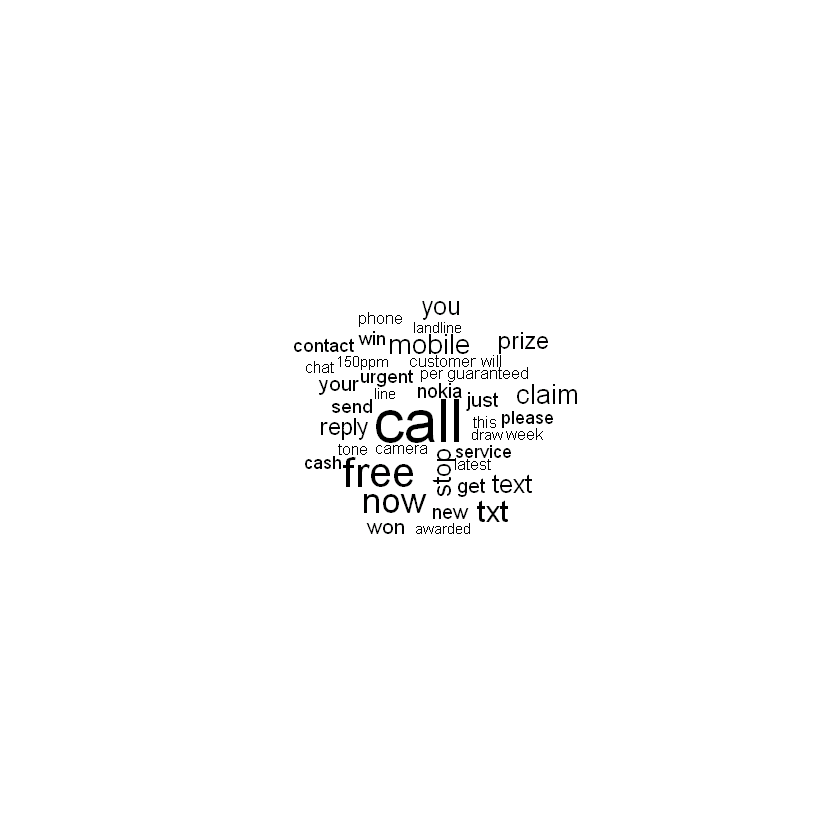

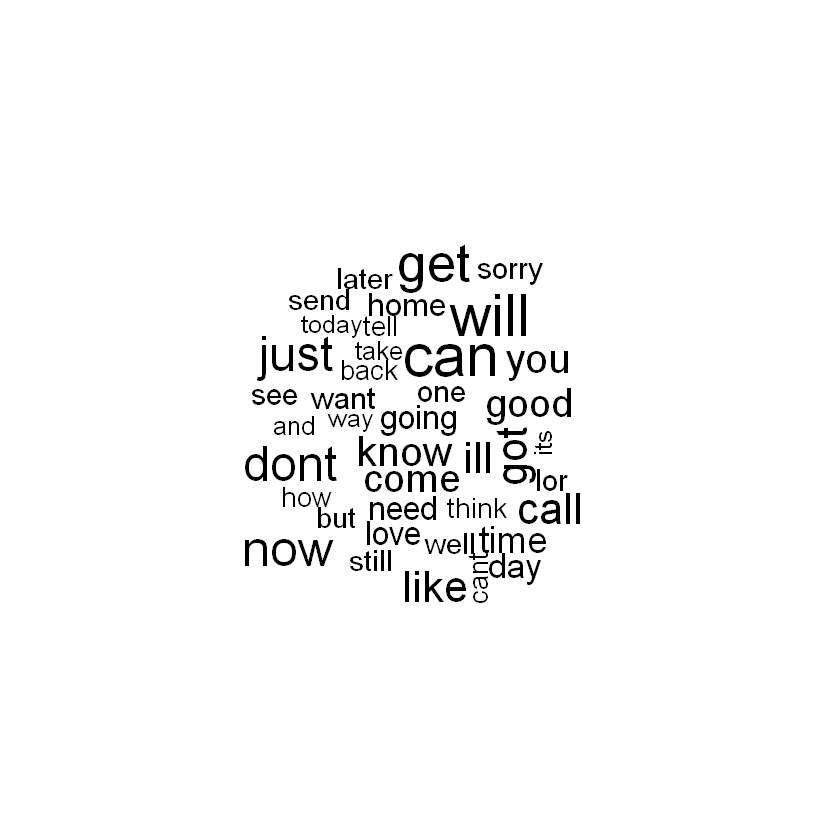

In [28]:
wordcloud(spam$text, max.words = 40, scale = c(3, .5))
wordcloud(ham$text, max.words = 40, scale = c(3, .5))

#### Creating indicator features for frequent words

We will need to use the findFreqTerms() functions found in the "tm" package

In [29]:
findFreqTerms(sms_dtm_train, 5)

[1] "ââ"               "abiola"              "able"               
   [4] "abt"                 "accept"              "access"             
   [7] "account"             "across"              "activate"           
  [10] "actually"            "add"                 "added"              
  [13] "address"             "admirer"             "advance"            
  [16] "aft"                 "afternoon"           "age"                
  [19] "ago"                 "aha"                 "ahead"              
  [22] "aight"               "aint"                "air"                
  [25] "aiyo"                "alex"                "almost"             
  [28] "alone"               "already"             "alright"            
  [31] "also"                "always"              "angry"              
  [34] "announcement"        "another"             "ans"                
  [37] "answer"              "anymore"             "anyone"             
  [40] "anything"            "anytime"             "anyway"             
  [43] "apartment"           "apply"               "appreciate"         
  [46] "arcade"              "ard"                 "area"               
  [49] "argument"            "around"              "arrive"             
  [52] "asap"                "ask"                 "askd"               
  [55] "asked"               "asking"              "attempt"            
  [58] "auction"             "available"           "ave"                
  [61] "await"               "awaiting"            "awake"              
  [64] "award"               "awarded"             "away"               
  [67] "awesome"             "âwk"                 "babe"               
  [70] "babes"               "baby"                "back"               
  [73] "bad"                 "bag"                 "bank"               
  [76] "barely"              "bathe"               "battery"            
  [79] "bcoz"                "bday"                "beautiful"          
  [82] "become"              "bed"                 "bedroom"            
  [85] "believe"             "best"                "better"             
  [88] "bid"                 "big"                 "bill"               
  [91] "birthday"            "bit"                 "black"              
  [94] "blue"                "bluetooth"           "bold"               
  [97] "bonus"               "boo"                 "book"               
 [100] "booked"              "boost"               "bored"              
 [103] "boss"                "bother"              "bout"               
 [106] "box"                 "boy"                 "boys"               
 [109] "boytoy"              "break"               "bring"              
 [112] "brings"              "brother"             "bslvyl"             
 [115] "btnationalrate"      "bucks"               "bus"                
 [118] "busy"                "buy"                 "buying"             
 [121] "cabin"               "call"                "called"             
 [124] "caller"              "callertune"          "calling"            
 [127] "calls"               "camcorder"           "came"               
 [130] "camera"              "campus"              "can"                
 [133] "cancel"              "cancer"              "cant"               
 [136] "car"                 "card"                "care"               
 [139] "carlos"              "case"                "cash"               
 [142] "cashbalance"         "catch"               "cause"              
 [145] "cell"                "centre"              "chance"             
 [148] "change"              "charge"              "charged"            
 [151] "charges"             "chat"                "cheap"              
 [154] "cheaper"             "check"               "checked"            
 [157] "checking"            "cheers"              "chennai"            
 [160] "chikku"              "childish"            "children"           
 [163] "choose"              "christmas"           "claim"   

In [30]:
 sms_dict <- c(findFreqTerms(sms_dtm_train, 5))

In [31]:
sms_train <- DocumentTermMatrix(sms_corpus_train, list(sms_dict))

In [32]:
sms_test <- DocumentTermMatrix(sms_corpus_test, list(sms_dict))

In [33]:
convert_counts <- function(x) {
    x <- ifelse(x > 0, 1 ,0)
    x <- factor(x, levels = c(0,1), labels = c("No", "Yes"))
    return(x)
}

In [34]:
sms_train <- apply(sms_train, MARGIN = 2, convert_counts)
sms_test <- apply(sms_test, MARGIN = 2, convert_counts)

### Step Three: Training the Model

In [35]:
install.packages("e1071", repo = "https://cran.r-project.org/")

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bradley Bailey\AppData\Local\Temp\RtmpiqDWhQ\downloaded_packages


In [36]:
library(e1071)

Warning message:
: package 'e1071' was built under R version 3.2.5

In [37]:
sms_classifier <- naiveBayes(sms_train, sms_raw_train$type)

### Step Four: Evaluate Model Performance

In [38]:
sms_test_pred <- predict(sms_classifier, sms_test)

In [39]:
library(gmodels)

Warning message:
: package 'gmodels' was built under R version 3.2.5

In [40]:
CrossTable(sms_test_pred, sms_raw_test$type, prop.chisq = FALSE, prop.t = FALSE, dnn = c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1195 |        22 |      1217 | 
             |     0.982 |     0.018 |     0.876 | 
             |     0.990 |     0.120 |           | 
-------------|-----------|-----------|-----------|
        spam |        12 |       161 |       173 | 
             |     0.069 |     0.931 |     0.124 | 
             |     0.010 |     0.880 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1207 |       183 |      1390 | 
             |     0.868 |     0.132 |           | 
-------------|-----------|-----------|-----------|

 


### Step Five: Improving Model Performance

In [77]:
sms_classifier2 <- naiveBayes(sms_train, sms_raw_train$type, laplace = 1)

In [78]:
sms_test_pred2 <- predict(sms_classifier2, sms_test)

In [79]:
CrossTable(sms_test_pred2, sms_raw_test$type, 
           prop.chisq = FALSE, prop.t = FALSE, prop.r = FALSE,
          dnn = c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1203 |        25 |      1228 | 
             |     0.997 |     0.137 |           | 
-------------|-----------|-----------|-----------|
        spam |         4 |       158 |       162 | 
             |     0.003 |     0.863 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1207 |       183 |      1390 | 
             |     0.868 |     0.132 |           | 
-------------|-----------|-----------|-----------|

 
